### Importing libraries and initializing dataframes

In [21]:
import pandas as pd
import numpy as np
# !python3 -m pip install seaborn
# !python3 -m pip install matplotlib
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv(r'qualitative_annotations_translations.csv')

# urban and rural df 
rural_df = df[df['Area'].isin([1])] 
urban_df = df[df['Area'].isin([0])]
# print(rural_df)
# CH_df only contains restaurants that have both CH and EN names
CH_df = df.dropna(subset=['Chinese_Name'])
CH_df = CH_df.reset_index(drop = True)
CH_rural_df = rural_df.dropna(subset=['Chinese_Name'])
# CH_rural_df = CH_rural_df.reset_index(drop = True)
CH_urban_df = urban_df.dropna(subset=['Chinese_Name'])
# CH_urban_df = CH_urban_df.reset_index(drop = True)

### Counting frequencies of categories

In [4]:
#print(CH_df)
# print(df.iloc[0]["Category_EN_1"])
# this function returns the frequency of a value in a pandas column
# print(df.shape[0])
def get_frequency(data, key, value):
    if value in data[key].unique():
        return data[key].value_counts()[value]
    return 0

# this function returns the frequency of a value in the 3 Category columns
def category_frq(data, category,lang):
    if lang == "EN":
        return get_frequency(data, "Category_EN_1",category) + get_frequency(data,"Category_EN_2",category) + get_frequency(data,"Category_EN_3",category)
    elif lang == "CH":
        return get_frequency(data, "Category_CH_1",category) + get_frequency(data,"Category_CH_2",category) + get_frequency(data,"Category_CH_3",category)
    return 0

### Plotting restaurant categories

Location EN percentage: 0.17692307692307693
Origin EN percentage: 0.15384615384615385
Names EN percentage: 0.1076923076923077
Specialty EN percentage: 0.2076923076923077
Positivity EN percentage: 0.13846153846153847
Culture EN percentage: 0.06923076923076923
Ambiance EN percentage: 0.2923076923076923
Other EN percentage: 0.015384615384615385
Pun_Creative CH percentage: 0.0
**************************************************************************
Location CH percentage: 0.17692307692307693
Origin CH percentage: 0.05384615384615385
Names CH percentage: 0.05384615384615385
Specialty CH percentage: 0.2230769230769231
Positivity CH percentage: 0.2923076923076923
Culture CH percentage: 0.06153846153846154
Ambiance CH percentage: 0.23846153846153847
Other CH percentage: 0.023076923076923078
Pun_Creative CH percentage: 0.07692307692307693


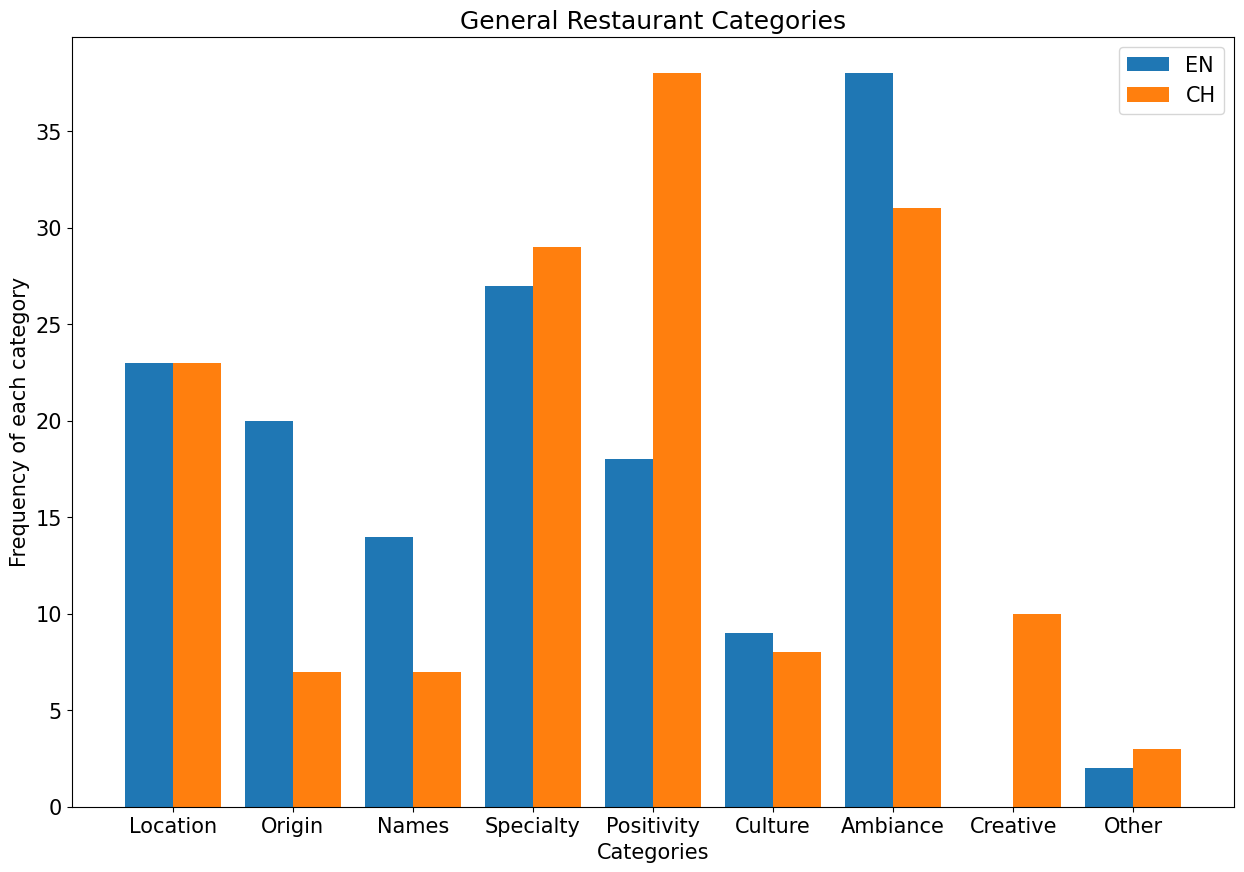

In [19]:
####################### English Category proportions
def plot_categories(data, title):
    location_EN = category_frq(data, "Location", "EN")
    #print(df.describe())
    loc_perc_EN = location_EN/130
    print("Location EN percentage:",loc_perc_EN)

    origin_EN = category_frq(data, "Origin", "EN")
    origin_perc_EN = origin_EN/130
    print("Origin EN percentage:",origin_perc_EN)

    names_EN = category_frq(data, "Names", "EN")
    names_perc_EN = names_EN/130
    print("Names EN percentage:",names_perc_EN)

    specialty_EN = category_frq(data, "Specialty", "EN")
    specialty_perc_EN = specialty_EN/130
    print("Specialty EN percentage:",specialty_perc_EN)

    positivity_EN = category_frq(data, "Positivity", "EN")
    positivity_perc_EN = positivity_EN/130
    print("Positivity EN percentage:",positivity_perc_EN)

    culture_EN = category_frq(data, "Culture", "EN")
    culture_perc_EN = culture_EN/130
    print("Culture EN percentage:",culture_perc_EN)

    ambiance_EN = category_frq(data, "Ambiance", "EN")
    ambiance_perc_EN = ambiance_EN/130
    print("Ambiance EN percentage:",ambiance_perc_EN)

    other_EN = category_frq(data, "Other", "EN")
    other_perc_EN = other_EN/130
    print("Other EN percentage:",other_perc_EN)

    pun_EN = category_frq(data, "Pun_Creative", "EN")
    pun_perc_EN = pun_EN/130
    print("Pun_Creative CH percentage:",pun_perc_EN)
    print("**************************************************************************")
    ####################### Chinese Category proportions
    location = category_frq(data, "Location", "CH")
    #print(df.describe())
    loc_perc = location/130
    print("Location CH percentage:",loc_perc)

    origin = category_frq(data, "Origin", "CH")
    origin_perc = origin/130
    print("Origin CH percentage:",origin_perc)

    names = category_frq(data, "Names", "CH")
    names_perc = names/130
    print("Names CH percentage:",names_perc)

    specialty = category_frq(data, "Specialty", "CH")
    specialty_perc = specialty/130
    print("Specialty CH percentage:",specialty_perc)

    positivity = category_frq(data, "Positivity", "CH")
    positivity_perc = positivity/130
    print("Positivity CH percentage:",positivity_perc)

    culture = category_frq(data, "Culture", "CH")
    culture_perc = culture/130
    print("Culture CH percentage:",culture_perc)

    ambiance = category_frq(data, "Ambiance", "CH")
    ambiance_perc = ambiance/130
    print("Ambiance CH percentage:",ambiance_perc)

    other = category_frq(data, "Other", "CH")
    other_perc = other/130
    print("Other CH percentage:",other_perc)

    pun = category_frq(data, "Pun_Creative", "CH")
    pun_perc = pun/130
    print("Pun_Creative CH percentage:",pun_perc)


    #### plotting ############################################
    # General
    X = ['Location','Origin','Names','Specialty','Positivity','Culture','Ambiance','Creative',"Other"]
    EN_category = [location_EN, origin_EN, names_EN, specialty_EN, positivity_EN, culture_EN, ambiance_EN, pun_EN, other_EN]
    CH_category = [location, origin, names,specialty, positivity, culture, ambiance, pun, other]

    X_axis = np.arange(len(X))
    plt.figure(figsize=(15, 10))
    plt.bar(X_axis - 0.2, EN_category, width =0.4, label = 'EN')
    plt.bar(X_axis + 0.2, CH_category, width =0.4, label = 'CH')

    #plt.xticks(np.arange(0, 3, step=0.5))
    plt.xticks(X_axis, X)
    plt.xlabel("Categories")
    plt.ylabel("Frequency of each category")
    plt.title(title)
    plt.legend()
    matplotlib.rcParams.update({'font.size': 15})
    plt.savefig(title+".png")
    plt.show()
    

#General
plot_categories(CH_df, "General Restaurant Categories")

# Urban
# plot_categories(CH_urban_df, "Urban Restaurant Categories")

# Rural only count the restaurants that have both Chinese and English names
# plot_categories(CH_rural_df, "Rural Restaurant Categories")

### plotting number of restaurants that don't have chinese names vs those who don't. Categorized based on urban/rural

12


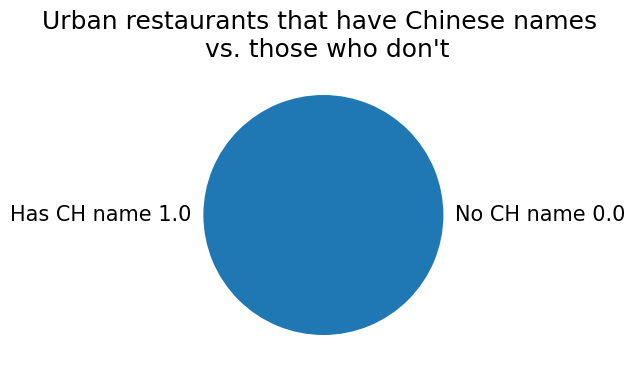

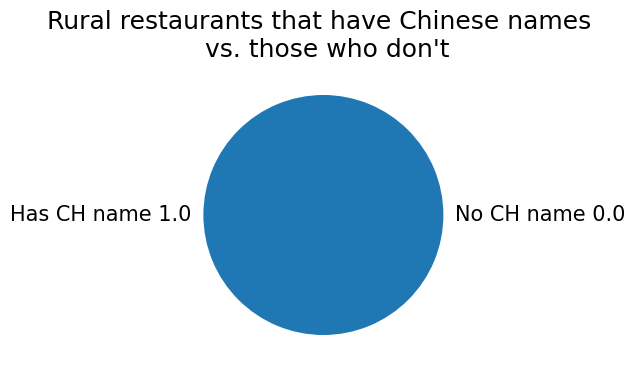

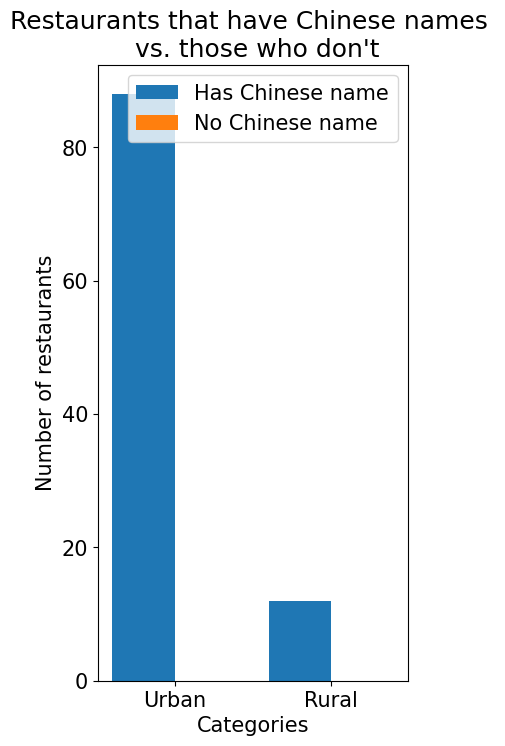

In [22]:

####################################################################################################################
# plotting number of restaurants that don't have chinese names vs those who don't. Categorized based on urban/rural
####################################################################################################################
nan_rural = rural_df['Chinese_Name'].isna().sum()
nan_urban = urban_df['Chinese_Name'].isna().sum()
has_rural = rural_df.shape[0] - nan_rural
has_urban = urban_df.shape[0] - nan_urban
print(rural_df.shape[0])

##### pie chart Urban ######################################
has_urban_perc = has_urban/urban_df.shape[0]
no_urban_perc = nan_urban/urban_df.shape[0]
number = [has_urban,nan_urban]
X = ["Has CH name "+str(has_urban_perc),"No CH name "+str(no_urban_perc)]
fig = plt.figure(figsize = (5,3)) # initialize the figure. figsize = (5,3)
ax = fig.add_axes([0,0,1,1]) # initialize the aces
ax.pie(number, labels=X)
plt.title("Urban restaurants that have Chinese names \n vs. those who don't")
plt.savefig("Urban restaurants.png")
plt.show()

##### pie chart Rural ######################################
has_rural_perc = has_rural/rural_df.shape[0]
no_rural_perc = nan_rural/rural_df.shape[0]
number = [has_rural,nan_rural]
X = ["Has CH name "+str(has_rural_perc),"No CH name "+str(no_rural_perc)]
fig = plt.figure(figsize = (5,3)) # initialize the figure. figsize = (5,3)
ax = fig.add_axes([0,0,1,1]) # initialize the aces
ax.pie(number, labels=X)
plt.title("Rural restaurants that have Chinese names \n vs. those who don't")
plt.savefig("Rural restaurants.png")
plt.show()

##### bar graph #########################
X = ['Urban','Rural']
has_CH = [has_urban, has_rural]
no_CH = [nan_urban, nan_rural]


X_axis = np.arange(len(X))
plt.figure(figsize=(4, 8))
plt.bar(X_axis - 0.2, has_CH, width =0.4, label = 'Has Chinese name')
plt.bar(X_axis + 0.2, no_CH, width =0.4, label = 'No Chinese name')

#plt.xticks(np.arange(0, 3, step=0.5))
plt.xticks(X_axis, X)
plt.xlabel("Categories")
plt.ylabel("Number of restaurants")
plt.title("Restaurants that have Chinese names \n vs. those who don't")
plt.legend()
plt.savefig("Chinese names.png")
plt.show()

### Measuring Naming Differences through 3 Metrics

In [6]:

######################################################################################################
# Metric 1: calculate the number overlapping categories against the total number of CH categories
# this function calculates the overlap of categories between the Chinese and english names
#######################################################################################################
def overlap_1(data,ind):
    # step 1: make sure the dataframe excludes the data that doens't have Chinese name
    # STEP 2: extract the Chinese categories into a list or df. Drop NaN
    CH_category = []
    categories = ["Category_CH_1","Category_CH_2","Category_CH_3"]
    for cat in categories:
        #print("cat",data.iloc[ind][cat],type(data.iloc[ind][cat]))
        if not pd.isna(data.iloc[ind][cat]): #data.iloc[ind][cat]:
            CH_category.append(data.iloc[ind][cat])
    #print("CH_category",CH_category)
    #STEP 3: calculate the overlaps
    overlaps = 0
    if data.iloc[ind]["Category_EN_1"] in CH_category: overlaps += 1
    if data.iloc[ind]["Category_EN_2"] in CH_category: overlaps += 1
    if data.iloc[ind]["Category_EN_3"] in CH_category: overlaps += 1
    return overlaps/len(CH_category)
# testing
#print("overlap",overlap(CH_df,16))
# this function calculates the general overlaps between name categories in a dataframe
# it also adds a new column "Metric 1 Retain Meanings" to the dataframe that contains the overlapping results it got
# should not take nan into account
def general_overlap_1(data):
    proportions = 0
    len_df = data.shape[0]
    new_col = []
    for ind in range(len_df):
        overlapped = overlap_1(data,ind)
        new_col.append(overlapped)
        proportions += overlapped
    data["Metric 1 Retain Meanings"] = new_col
    return proportions/len_df

print("Metric 1 Chinese Meanings Retained in English Names (0-1):",general_overlap_1(CH_df))
print(CH_df["Metric 1 Retain Meanings"])

######################################################################################################
# Metric 2: for one restaurant: calculate the number overlapping categories against the total number 
# of unique EN and CH categories combined
#######################################################################################################
def overlap_2(data,ind):
    # step 1: make sure the dataframe excludes the data that doens't have Chinese name
    # STEP 2: extract the Chinese categories into a list or df. Drop NaN
    CH_category = []
    categories = ["Category_CH_1","Category_CH_2","Category_CH_3"]
    for cat in categories:
        #print("cat",data.iloc[ind][cat],type(data.iloc[ind][cat]))
        if not pd.isna(data.iloc[ind][cat]): #data.iloc[ind][cat]:
            CH_category.append(data.iloc[ind][cat])
    all_categories = CH_category
    #print("CH_category",CH_category)
    #STEP 3: calculate the overlaps
    overlaps = 0
    
    EN_category = ["Category_EN_1","Category_EN_2","Category_EN_3"]
    for cat_en in EN_category:
        curr = data.iloc[ind][cat_en]
        if curr in CH_category:
            overlaps += 1
        elif not pd.isna(curr):
            all_categories.append(curr)
    return overlaps/len(all_categories)
# testing
#print("overlap",overlap(CH_df,16))
# this function calculates the general overlaps between name categories in a dataframe
# should not take nan into account
def general_overlap_2(data):
    proportions = 0
    len_df = data.shape[0]
    new_col = []
    for ind in range(len_df):
        overlapped = overlap_2(data,ind)
        proportions += overlapped
        new_col.append(overlapped)
    data["Metric 2 Similarities"] = new_col
    return proportions/len_df
print("Metric 2 Overlaps between CH and EN names (0-1):",general_overlap_2(CH_df))
print(CH_df["Metric 2 Similarities"])

######################################################################################################
# Metric 3: Counting the number of new categories in EN names that's not in Chinese. Measures the creativity
# of EN names
#######################################################################################################
def overlap_3(data,ind):
    # step 1: make sure the dataframe excludes the data that doens't have Chinese name
    # STEP 2: extract the Chinese categories into a list or df. Drop NaN
    CH_category = []
    categories = ["Category_CH_1","Category_CH_2","Category_CH_3"]
    for cat in categories:
        #print("cat",data.iloc[ind][cat],type(data.iloc[ind][cat]))
        if not pd.isna(data.iloc[ind][cat]): #data.iloc[ind][cat]:
            CH_category.append(data.iloc[ind][cat])
    diff = 0
    EN_category = ["Category_EN_1","Category_EN_2","Category_EN_3"]
    for cat_en in EN_category:
        curr = data.iloc[ind][cat_en]
        if curr not in CH_category and not pd.isna(curr):
            diff += 1
    return diff
# testing
#print("overlap",overlap(CH_df,16))
# this function calculates the general overlaps between name categories in a dataframe
# should not take nan into account
def general_overlap_3(data):
    proportions = 0
    len_df = data.shape[0]
    new_col = []
    for ind in range(len_df):
        overlapped = overlap_3(data,ind)
        proportions += overlapped
        new_col.append(overlapped)
    data["Metric 3 Creativity"] = new_col
    return proportions/len_df
print("Metric 3 New Categories in English Names (0-3):",general_overlap_3(CH_df))

CH_df.to_csv('qualitative_annotations_translations.csv', encoding='utf-8')

Metric 1 Chinese Meanings Retained in English Names (0-1): 0.5016666666666666
0     0.5
1     1.0
2     0.0
3     0.0
4     0.5
     ... 
95    0.0
96    0.5
97    0.0
98    1.0
99    1.0
Name: Metric 1 Retain Meanings, Length: 100, dtype: float64
Metric 2 Overlaps between CH and EN names (0-1): 0.4016666666666667
0     0.500000
1     0.500000
2     0.000000
3     0.000000
4     0.500000
        ...   
95    0.000000
96    0.250000
97    0.000000
98    0.666667
99    1.000000
Name: Metric 2 Similarities, Length: 100, dtype: float64
Metric 3 New Categories in English Names (0-3): 0.87


### Correlation Analysis

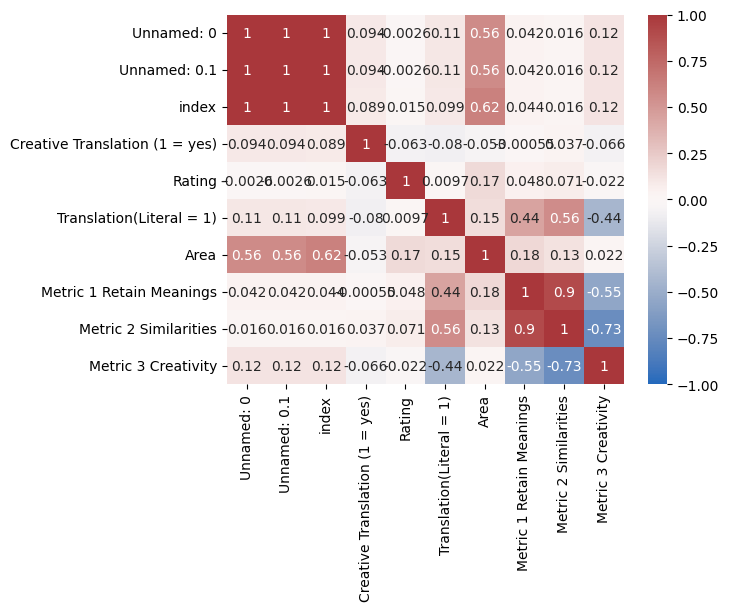

In [7]:
matrix = CH_df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig("Correlation.png")
plt.show()